In [37]:
import matplotlib.pyplot as plt
from Utils import prim_dens
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import sys

def visualize_precision_and_recall(precision_train, recall_train, precision_test, recall_test):

    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(recall_train, precision_train, c='blue', marker='o')
    
    plt.scatter(recall_test, precision_test, c='red', marker='o')

    plt.xlim(0, 1.1)
    plt.ylim(0, 1.1)

    # Add labels and a legend
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision vs. Recall')
    plt.legend()

    # Display the plot
    plt.grid(True)
    return plt


In [109]:
def flat_prec_rec(prec, rec):
    prec = [item for sublist in prec for item in sublist]
    rec = [item for sublist in rec for item in sublist]
    return prec, rec

In [ ]:
def calculate_precision_recall_test_data(lims, x_test, y_test):
    
    precision_test = []
    recall_test = []

    #iterate over limit entries which is list of dataframes
    for j in range(len(lims)):
        # Initialize TP, FP, TN, FN counters
        tp = 0
        fp = 0
        tn = 0
        fn = 0
        box = lims[j]
        box = pd.DataFrame(box)
        # Iterate over each row of temp_data
        for row_index, row in x_test.iterrows():
            is_within_limits = True
            # Check if entry lies within the specified limits
            for a, (column, value) in enumerate(row.iteritems()):
                is_within_limits = (box.iloc[0, a] <= value <= box.iloc[1, a]) & is_within_limits
            
            if is_within_limits & (y_test[row_index] == 1):
                tp = tp + 1
            if is_within_limits & (y_test[row_index] == 0):
                fp = fp + 1
            if (is_within_limits == False) & (y_test[row_index] == 0):
                tn = tn + 1
            if (is_within_limits == False) & (y_test[row_index] == 1):
                fn = fn + 1
                
        precision = recall = 0  # Default values
    
        if (tp + fp) > 0:
            precision = tp / (tp + fp)
        if (tp + fn) > 0:
            recall = tp / (tp + fn)
    
        precision_test.append(precision)
        recall_test.append(recall)
            
    return precision_test, recall_test
 

In [88]:
def define_train_test_split(data_name, stratify_feature, drop_feature, test_size):
    
    if (data_name) == 'Bryant':
        data = pd.read_csv('/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Data/Bryant et al 2010.csv')
        
    else:
        if (data_name) == 'Rozenberg':
            data = pd.read_csv('/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Data/Rozenberg et al 2014.csv')
            
    scaler = MinMaxScaler()
    data1 = data
    data = scaler.fit_transform(data)
    data = pd.DataFrame(data, index = data1.index, columns=data1.columns)
        
    #sampeling a subset of the whole data set
    sample_train, sample_test = train_test_split(data, test_size=test_size, stratify=data[stratify_feature])
        
    sample_train = pd.DataFrame(data=sample_train.values, columns=sample_train.columns)
    sample_test = pd.DataFrame(data=sample_test.values, columns=sample_test.columns)

    y = sample_train[stratify_feature]
    x = pd.DataFrame(sample_train.drop(columns=drop_feature))
            
    y_test = sample_test[stratify_feature]
    x_test = pd.DataFrame(sample_test.drop(columns=drop_feature))
        
    return x, y, x_test, y_test

experiment 99/100

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


experiment 100/100

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

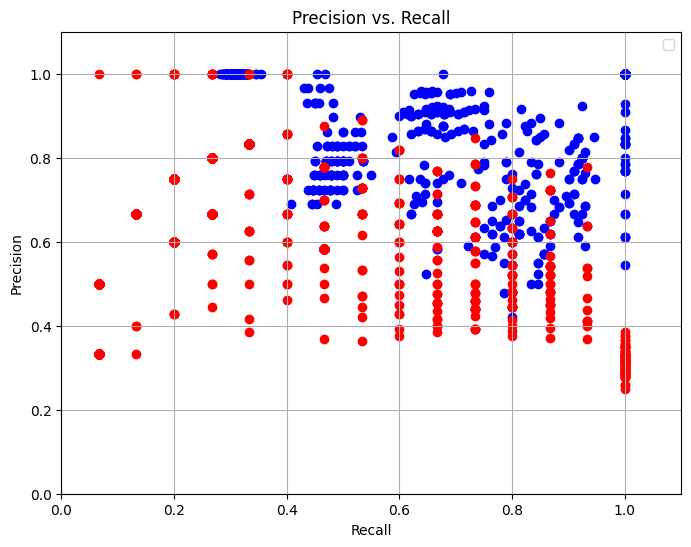

In [105]:
#baseline normal dataset, not modified

number_of_repeats = 100

prec_train = []
rec_train = []

prec_test = []
rec_test = []

for i in range(number_of_repeats):
    sys.stdout.write('\r' + 'experiment' + ' ' + str(i + 1) + '/' + str(number_of_repeats))


    x, y, x_test, y_test = define_train_test_split('Rozenberg', 'SSP1', ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'], 0.333)

    prim_alg = prim_dens.PRIMdens(x.values, y, alpha=0.1)
    prim_alg.fit()
    precisions = prim_alg.get_precisions()
    recalls = prim_alg.get_recalls()
    boxes1 = prim_alg.get_boxes()

    for index in range(len(precisions)):
        rec_train.append(precisions[index])
        prec_train.append(recalls[index])
        
    prec_test_temp, rec_test_temp = calculate_precision_recall_test_data(boxes1, x_test, y_test)
    prec_test.append(prec_test_temp)
    rec_test.append(rec_test_temp)
    
prec_test, rec_test = flat_prec_rec(prec_test, rec_test)
visualize_precision_and_recall(prec_train, rec_train, prec_test, rec_test)


experiment 100/100

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

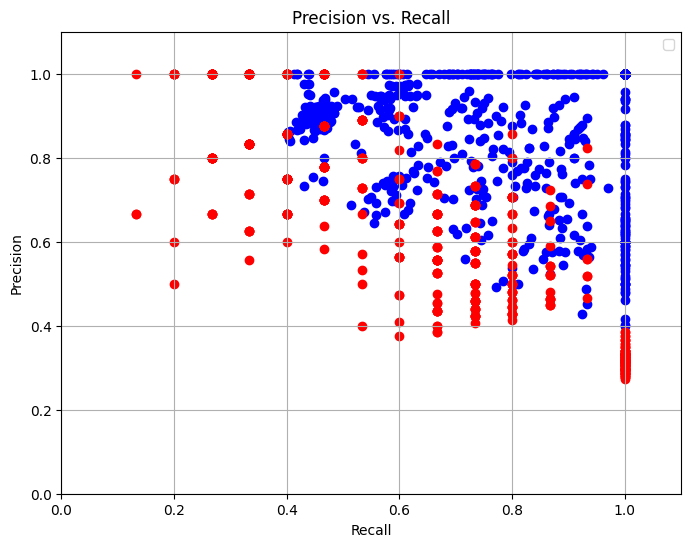

In [110]:
#duplicate 1 in each box from test data

lims = boxes1

prec_train = []
rec_train = []

prec_test = []
rec_test = []

for z in range(number_of_repeats):
    x, y, x_test, y_test = define_train_test_split('Rozenberg', 'SSP1', ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'], 0.333)
    sys.stdout.write('\r' + 'experiment' + ' ' + str(z + 1) + '/' + str(number_of_repeats))


    labels2 = y.copy()
    data2 = x.copy()

    #iterate over limit entries which is list of dataframes
    for i in range(len(lims)):
        
        box = lims[i]
        box = pd.DataFrame(box)
        # Iterate over each row of temp_data
        for index, row in x.iterrows():
            is_within_limits = True
            a = 0
            # Check if entry lies within the specified limits
            for column, value in row.iteritems():
                is_within_limits = (box.iloc[0, a] <= value <= box.iloc[1, a]) & is_within_limits
                a = a + 1
            if is_within_limits:
                data2.loc[len(data2)] = row
                labels2.loc[len(labels2)] = y[index]

    prim_alg2 = prim_dens.PRIMdens(data2.values, labels2, alpha=0.1)
    prim_alg2.fit()
    precisions = prim_alg2.get_precisions()
    recalls = prim_alg2.get_recalls()
    boxes = prim_alg2.get_boxes()

    for index in range(len(precisions)):
        rec_train.append(precisions[index])
        prec_train.append(recalls[index])
    
    prec_test_temp, rec_test_temp = calculate_precision_recall_test_data(boxes1, x_test, y_test)
    prec_test.append(prec_test_temp)
    rec_test.append(rec_test_temp)
    
prec_test, rec_test = flat_prec_rec(prec_test, rec_test)

visualize_precision_and_recall(prec_train, rec_train, prec_test, rec_test)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

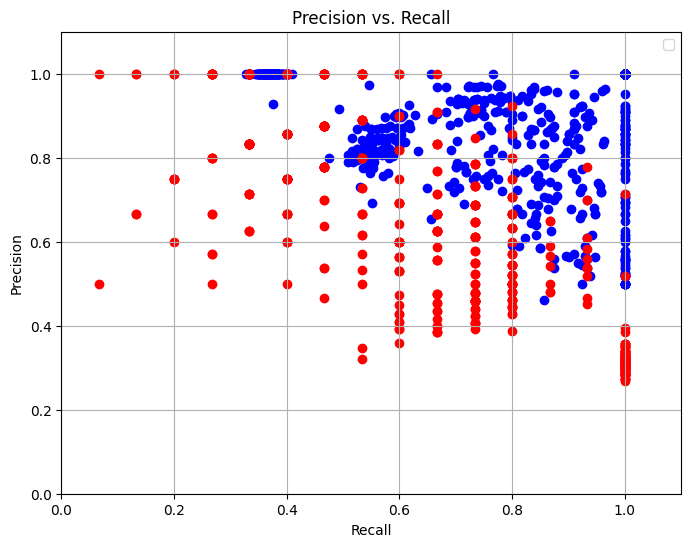

In [111]:
#duplicate 1 in best box
lims = boxes1

prec_train = []
rec_train = []

prec_test = []
rec_test = []

for z in range(number_of_repeats):

    x, y, x_test, y_test = define_train_test_split('Rozenberg', 'SSP1', ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'], 0.333)

    labels3 = y
    data3 = x
    box = lims[len(lims) - 1]
    box = pd.DataFrame(box)

    # Iterate over each row of temp_data
    for index, row in x.iterrows():
        is_within_limits = True
        # Check if entry lies within the specified limits
        for a, (column, value) in enumerate(row.iteritems()):
            is_within_limits = (box.iloc[0, a] <= value <= box.iloc[1, a]) & is_within_limits
        if is_within_limits:
            data3.loc[len(data3)] = row
            labels3.loc[len(y)] = y[index]

    prim_alg2 = prim_dens.PRIMdens(data3.values, labels3, alpha=0.1)
    prim_alg2.fit()
    precisions = prim_alg2.get_precisions()
    recalls = prim_alg2.get_recalls()
    boxes = prim_alg2.get_boxes()

    for index in range(len(precisions)):
        rec_train.append(precisions[index])
        prec_train.append(recalls[index])
    
    prec_test_temp, rec_test_temp = calculate_precision_recall_test_data(boxes1, x_test, y_test)
    prec_test.append(prec_test_temp)
    rec_test.append(rec_test_temp)
    
prec_test, rec_test = flat_prec_rec(prec_test, rec_test)
    
visualize_precision_and_recall(prec_train, rec_train, prec_test, rec_test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

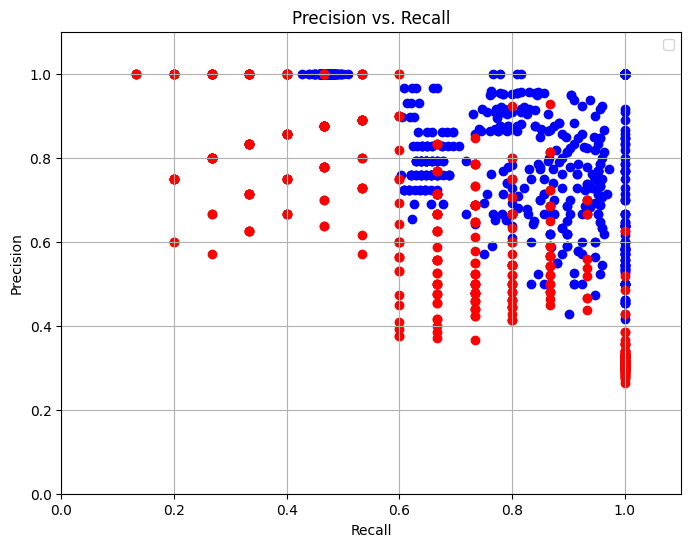

In [112]:
#duplicate 1 in best box
lims = boxes1

prec_train = []
rec_train = []

prec_test = []
rec_test = []

for z in range(number_of_repeats):

    x, y, x_test, y_test = define_train_test_split('Rozenberg', 'SSP1', ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'], 0.333)

    labels4 = y.copy()
    data4 = x.copy()

    # Iterate over each row of temp_data
    for index, row in x.iterrows():
        if y[index] == 1:
            data4.loc[len(data4)] = row
            labels4.loc[len(labels4)] = y[index]

    prim_alg4 = prim_dens.PRIMdens(data4.values, labels4, alpha=0.1)
    prim_alg4.fit()
    precisions = prim_alg4.get_precisions()
    recalls = prim_alg4.get_recalls()
    boxes = prim_alg4.get_boxes()

    for index in range(len(precisions)):
        rec_train.append(precisions[index])
        prec_train.append(recalls[index])
    
    prec_test_temp, rec_test_temp = calculate_precision_recall_test_data(boxes1, x_test, y_test)
    prec_test.append(prec_test_temp)
    rec_test.append(rec_test_temp)
    
prec_test, rec_test = flat_prec_rec(prec_test, rec_test)
    
visualize_precision_and_recall(prec_train, rec_train, prec_test, rec_test)